## Libraries 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(16,10))

In [3]:
import json

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import  AdaBoostClassifier
#!pip install lightgbm
import lightgbm as lgb

In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.models import Model
from pathlib import Path

In [8]:
from keras.optimizers import Adam
from livelossplot.inputs.keras import PlotLossesCallback
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [9]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import LeakyReLU

---------------

## Functions

In [10]:
def checkBalance(dataset,target_name):
    print("=======================================")
    print(f"Target Name : {target_name}")
    print("=======================================")
    print("value count")
    print(dataset[target_name].value_counts())
    print("=======================================")
    sns.histplot(x =target_name,data = dataset)
    plt.show()

In [11]:
def check_unique(dataframe,feature_name,target_name):
    # get a list of the unique values 
    uniqueLst = list(dataframe[feature_name].unique())
    # the length of the unique values 
    uniquelength = len(uniqueLst)
    # count the appenrance of each value in the dataset 
    count = dataframe[feature_name].value_counts()
    sorted_count = count.sort_values() 
    # print some information about the feature 
    print(f"Feature : {feature_name}")
    print(f"Number of unique values : {uniquelength}")
    print("=================================")
    print("(Attack'category,count)")
    print(sorted_count)
    print("=================================")
    #sns.histplot(data=, x=feature_name,hue="label", kde=True)
    sns.displot(x =feature_name,hue=target_name,data = dataframe, kind="kde", multiple="stack")
    plt.show()

In [12]:
def count_number_word(lst_of_lst):
    
    wv_lens =[]

    for x in lst_of_lst:
         wv_lens.append(len(x))

    myset = set(wv_lens)

    counts = [wv_lens.count(x)for x in myset]

    df2 = pd.DataFrame({
        "number of words":list(myset),
        "count":counts
    })
    
    return df2


In [13]:
def padd_zeros(row,n_words):
    # get number of words in this row
    length = len(row)
    # create new list that contain the value of the new length 
    new_lst = []
    
    for i in range(n_words):
        if i < length:
            new_lst.append(row[i])
        else:
    
            listofzeros = [0]*100
            new_lst.append(list(listofzeros))   
        
        
    row = new_lst
    
    return row

In [14]:
def prepare_equalWords_data(data,n_words):
    # create a new data frame 
    nemDF = data.copy()
    # pad zeros 
    nemDF['word_vector'] = nemDF['word_vector'].apply(lambda row: padd_zeros(row,n_words)) 
    # recount again 
    nemDF['word_count']  = nemDF['word_vector'].apply(lambda x: len(x))    
    # encode the label to be 0 and 1 instead 1 and 2 
    nemDF['label']  = nemDF['label'].apply(lambda x: int(x-1))    
    
    return nemDF

In [15]:
def visualize_class(data,y):
    plt.figure(figsize=(20,20))
    
    s= [v== y for v in data['label']]
    idxs = np.flatnonzero(s)
    idxs = np.random.choice(idxs, 5, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(1,5, i+1)
        plt.imshow(data['word_vector'][idx])
        plt.axis('off')
        plt.title(y)
    plt.show()
            
def visualize_classes(data,classes):
    for y in classes:
        visualize_class(data,y)
    

In [16]:
def normalize_lst(a):
    lst = np.array(a).reshape(-1,1)
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    normalizedlist=scaler.fit_transform(lst)
    return normalizedlist

In [17]:
def get_words(data_frame,n_words):    
    new_x=[]

    for i in range(len(data_frame)):
            templist= np.array([]) 
            np_word = np.array(data_frame['word_vector'][i])
            templist= np.append(templist,np_word[:n_words])
            
            if(np_word.shape[0] <  n_words):
                numeToAdd = n_words - np_word.shape[0]
                templist= np.append(templist, np.zeros(100*numeToAdd))
            
            templist=templist.tolist()
            new_x.append(templist) 

    return new_x

In [18]:
import keras.backend as K
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

--------------

--------

<h3 style="color:maroon;"> Read the Dataset </h3>

<h3> Task 1: KISTI+IDS2021-CDMC: Network Intrusion Detection [1]</h3>

- KISTI-IDS-2021 is the collection of real-world network IDS alerts that contain 25 types of attacks and payload information. 

* The dataset has 153,829 IDS alerts which are labeled as :
    <h3 style="color:maroon;">malicious(label:1)  </h3>   
    <h3 style="color:maroon;">benign(label:2)     </h3>  
    
<h3 style="color:blue;">Also, all of the words in payload are embedded as a word vector to 100-dimension for each word.</h3>   

- The purpose of the dataset is to encourage IDS research in terms of real-world environments considering payload contents. 

- It is divided into training (80%) and test set (20%) with 4-columned TAB separated structure (idx, category, wordvector(payload), label).

<h3 style="color:blue;">In this project we will work on the training only</h3>   

In [19]:
data = pd.read_csv("Training.tsv",sep="\t")

-----------------------

<h3 style="color:maroon;">How the data look like </h3>

In [20]:
data.head()

,Unnamed: 0,category,word_vector,label
0,0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",2.0
1,1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1.0
2,2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",1.0
3,3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",1.0
4,4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",2.0


<h3 style="color:maroon;">Info about the data</h3>

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123040 entries, 0 to 123039
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   123040 non-null  int64  
 1   category     123040 non-null  int64  
 2   word_vector  123040 non-null  object 
 3   label        123040 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB
None


<h3 style="color:maroon;">drop the "unnamed: 0" column </h3>

In [22]:
data = data.drop(['Unnamed: 0'], axis=1)

In [23]:
data.head()

,category,word_vector,label
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",2.0
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1.0
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",1.0
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",1.0
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",2.0


<h3 style="color:maroon;"> Check the balance of data </h3>

Target Name : label
value count
2.0    61520
1.0    61520
Name: label, dtype: int64


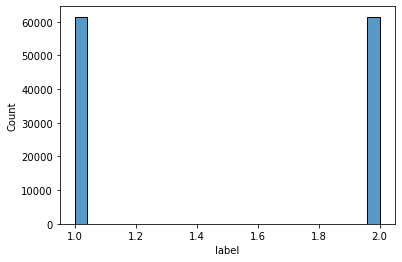

In [24]:
checkBalance(data,"label")

the data is balanced 

<h3 style="color:maroon;">check the unique values in the "category" feature </h3>

Feature : category
Number of unique values : 25
(Attack'category,count)
12        6
2        18
5        34
10      154
14      218
15      306
8       368
11      480
3       608
23      608
4       730
22      920
9      1146
20     1246
0      1250
17     1744
18     2894
16     3666
19     4766
1      4978
21     5016
7      6202
6     15346
24    24434
13    45902
Name: category, dtype: int64


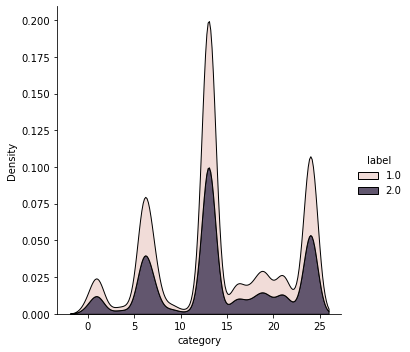

In [25]:
check_unique(data,"category","label")

<h3 style="color:maroon;"> check is there any problem in the word_vector feature</h3>

#### first transfer it from an object to list of lists 

In [26]:
data['word_vector'] = [json.loads(x) for x in data['word_vector']] # list of lists 

#### count number of words in each row in the data  and summarize the results

In [27]:
word_count_df = count_number_word(data['word_vector'])

In [28]:
word_count_df

,number of words,count
0,1,51441
1,2,4255
2,3,7868
3,4,3746
4,5,4911
...,...,...
123,125,2
124,127,9
125,133,1
126,154,3


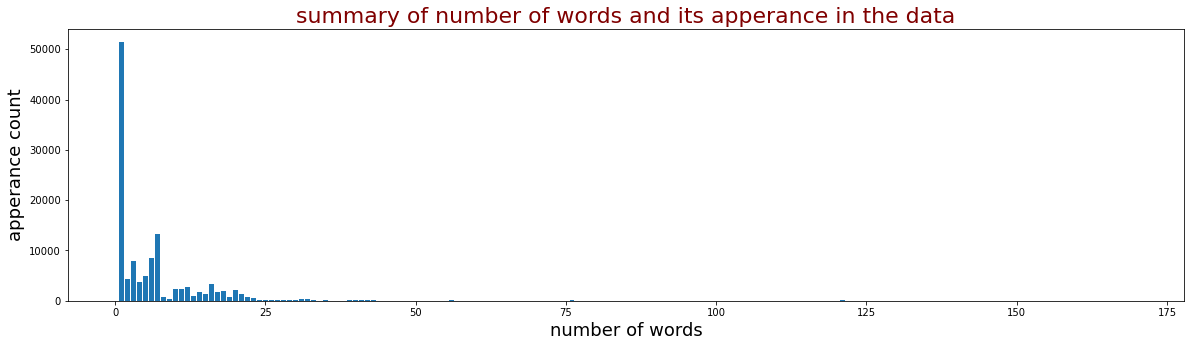

In [29]:
#sns.histplot(x ='count',data = word_count_df)
plt.figure(figsize=(20,5))
plt.xlabel("number of words", fontsize=18)
plt.ylabel("apperance count", fontsize=18)
plt.title("summary of number of words and its apperance in the data",fontsize=22,color="maroon")
plt.bar(word_count_df['number of words'],word_count_df['count'])
plt.show()

<h3 style="color:maroon;">Append number of words in each row to the data</h3>

In [30]:
data['word_count'] = data['word_vector'].apply(lambda x: len(x))

In [31]:
data

,category,word_vector,label,word_count
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",2.0,19
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1.0,1
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",1.0,7
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",1.0,14
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",2.0,1
...,...,...,...,...
123035,24,"[[-0.081545, 0.25175, 0.027983, 0.064531, 0.25...",2.0,20
123036,7,"[[-0.35721, -0.54399, 0.26479, -0.15312, -0.00...",2.0,4
123037,19,"[[-1.5145, 0.9682, 0.34735, 1.0024, 0.042789, ...",2.0,13
123038,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1.0,1


<h3 style="color:maroon;">Check the effect of number of words in the payload to the target</h3>

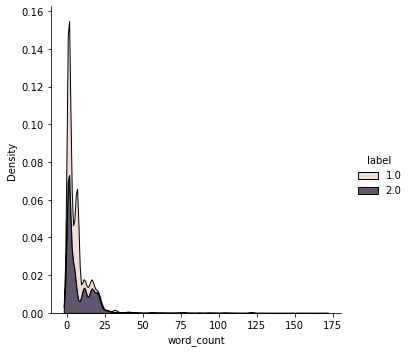

In [32]:
sns.displot(x =data['word_count'],hue=data['label'],data = data, kind="kde", multiple="stack")
plt.show()

<h3 style="color:maroon;"> let all the rows have an equal size of the word_vector</h3>

In [24]:
data5 = prepare_equalWords_data(data,5)

In [25]:
data5

,category,word_vector,label,word_count
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,5
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,5
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,5
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,5
...,...,...,...,...
123035,24,"[[-0.081545, 0.25175, 0.027983, 0.064531, 0.25...",1,5
123036,7,"[[-0.35721, -0.54399, 0.26479, -0.15312, -0.00...",1,5
123037,19,"[[-1.5145, 0.9682, 0.34735, 1.0024, 0.042789, ...",1,5
123038,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,5


<h3 style="color:maroon;"> Visualize 5 images for each class in the data </h3>

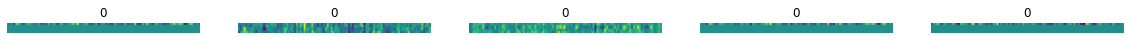

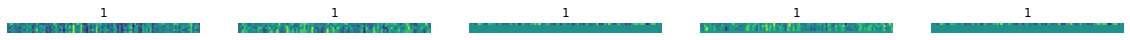

In [26]:
train_lst = list(np.unique(data5['label']))
visualize_classes(data5,train_lst)

### Save the data

In [34]:
# saving the dataframe
data5.to_csv('data5.csv')

------------------

In [42]:
data10 = prepare_equalWords_data(data,10)

In [43]:
data10.head()

,category,word_vector,label,word_count
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,10
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,10
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,10
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,10
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,10


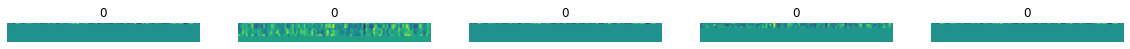

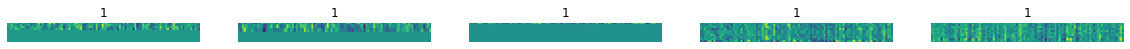

In [44]:
train_lst = list(np.unique(data10['label']))
visualize_classes(data10,train_lst)

In [45]:
# saving the dataframe
data10.to_csv('data10.csv')

----------------------

In [33]:
data25 = prepare_equalWords_data(data,25)

In [34]:
data25.head()

,category,word_vector,label,word_count
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,25
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,25
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,25
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,25
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,25


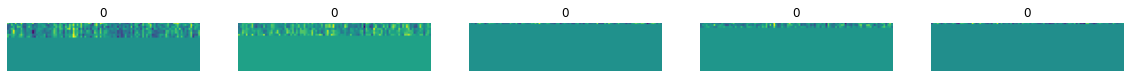

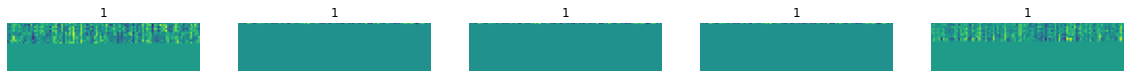

In [35]:
train_lst = list(np.unique(data25['label']))
visualize_classes(data25,train_lst)

In [36]:
# saving the dataframe
data25.to_csv('data25.csv')

----------------------

In [37]:
data50 = prepare_equalWords_data(data,50)

In [38]:
data50.head()

,category,word_vector,label,word_count
0,24,"[[-0.507, -0.49518, 0.46885, 0.54524, -0.11552...",1,50
1,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",0,50
2,24,"[[-0.7403, -0.78746, 0.47018, 0.43474, 0.05842...",0,50
3,21,"[[-0.44257, -0.54624, 0.25403, 0.80731, 1.026,...",0,50
4,13,"[[0.19911, -0.46156, 0.19674, -1.3298, 0.51805...",1,50


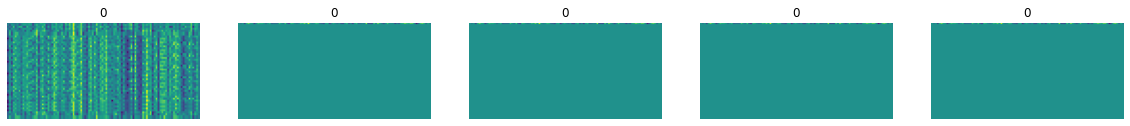

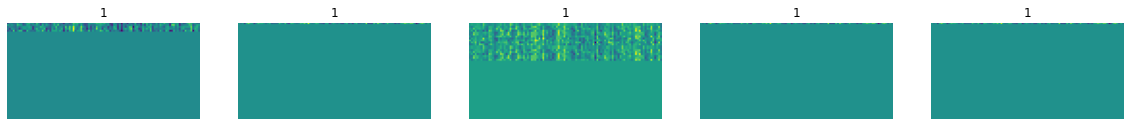

In [39]:
train_lst = list(np.unique(data25['label']))
visualize_classes(data50,train_lst)

In [40]:
# saving the dataframe
data50.to_csv('data50.csv')

-------------

## References 

[1] https://www.csmining.org/cdmc2021/index.php?id=5

[2] https://keras.io/api/applications/